In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"b08c162c-5b2e-4d41-b1ba-6a7ff694cf49\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Zillow Housing Data\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

### Introduction



**Research Question: **Did the investment and expansion of public transportation infrastructure (specifically the extension of BART to Warm Springs in Fremont, CA) lead to an increase in local property values in proximity to the new transit station?

**Null Hypothesis: **The construction and completion of the Warm Springs Transit Center has no effect on local property values in the two zip codes in closest proximity to the Warm Springs Transit Center. 

**Alternative Hypothesis: **The construction and completion of the Warm Springs Transit Center has an effect on local property values in the two zip codes in closest proximity to the Warm Springs Transit Center. 

**Empirical Model: **Yit = B0 + B1(Treatmenti) + B2(Posti) + B3(Treatmenti x Posti) + B4Control + B5Control + B6Control + Eit. 

Each observation is a zip-code and month combination, where each observation corresponds to the mean of the middle third property values within a particular zip code for a specific month. The dependent variable, Yit is the logarithmic transformation of the property value, adjusted for inflation in 2020 dollars. It is a continuous variable based on the mean middle third of property values in a zip code. Its purpose is to capture how property values change over time in response to the treatment, which is the opening of the Warm Springs Transit Center. Treatmenti (Treatment Group) is an independent variable. This is a binary variable that indicates whether the zip code is in the treatment group (zip codes 94538 and 94539) or in the control group (other zip codes in an outer ring around the controls). 1 denotes treatment zip codes, and 0 denotes other zip codes. Postt is the post-treatment period, which indicates if the observation occurs after the completion of the Warm Springs Transit Center. It is 1 for the months after the station opened and 0 for before. The interaction term, Treatmenti x Posti is 1 for observations in the treatment group after construction and 0 for others. This captures the other effect of the transit center on property values in the treatment zip codes relative to the control zip codes. The control independent variables in our case are mortgage rate, unemployment rate, and the lag of the logarithmic and inflation adjusted property values. The mortgage rate is the average mortgage rate in California for the year, which aims to control for broader economic values that affect property values. The unemployment rate is the unemployment rate in the zip code for the given year. The lag of the log-transformed property value accounts for previous property values in the last month, which aims to improve the fit of the model. We chose to lag by one month because the data is monthly, and we wanted to capture immediate effects of the transit station. 

The coefficient B0 is the intercept, or the baseline of log-transformed property value when all other variables have a value of 0. The coefficient B1 is the effect of the post-treatment effect, which captures the overall time effect on property values after the transit center completion for both the treatment and control groups. B3 is the coefficient of interest, which captures the additional effects of the transit center on property values in the treatment group relative to the control group. This is the coefficient discussed in the hypothesis, which can be reduced to H0: B3 = 0, and Ha: B3 != 0. B4, B5, and B6 are the coefficients for the independent control variables that attempt to control for other influences on property values. Eit is the error term, which we expect to be quite large and encompassing many omitted variables and random noise, given that many are hard to find data for or include due to multicollinearity issues. Unfortunately, due to omitted variable bias, the error term might be correlated with an independent variable in our formula, leading to endogeneity and thus biased estimates from our model. This will be discussed more later, but we could not include number of households and number of housing units, for instance, since they led to issues of multicollinearity. These are other independent variables are likely captured by the error term. 

**Define significance level: **alpha = 0.05

**Why explore this question?**

This question is of interest because property values have generally been shown to increase as a result of transit projects, according to the Federal Transit Administration. Increasing the connections, reliability, and convenience of public transportation within a region can support value creation. We were curious as to how the expansion of BART in the East Bay affected property values in what is already considered to be an expensive home-buying and rental market, relative to many other regions in California and the United States. 

[https://www.transit.dot.gov/valuecapture](https://www.transit.dot.gov/valuecapture)

**Background information about the Warm Springs Transit Center project**

We chose to look at the Warm Springs project in particular because we could more easily explore the effect of transit on property values, without the confounding effects of COVID. Initially, we considered analyzing the extension of BART to the Berryessa Station in Santa Clara County, but the station opened in 2021 and experienced delays due to COVID and other factors. The pandemic also influenced the housing market, which creates challenges to control for these effects in a quantifiable way. 

The 2008 recession and California budget crisis impacted the timeline of the Warm Springs project. Originally, construction was anticipated to begin earlier but started in 2009 as opposed due to funding availability and economic conditions, and the construction timeline was extended. Instead of opening in 2014, the station opened on March 25, 2017 for service. There were several factors for this delay. The state budget crisis reduced overall funding for transportation and the dissolution of redevelopment agencies in 2011 strained local funding sources ([https://www.bart.gov/about/projects/wsx/chronology](https://www.bart.gov/about/projects/wsx/chronology?utm_source=chatgpt.com)). In 2008, the Metropolitan Transportation Commission redirected $91 million from the Dumbarton Rail Corridor project to the Warm Springs project to address budgetary gaps and move the project along ([http://apps.mtc.ca.gov/meeting_packet_documents/agenda_1127/4e_tmp-3434.pdf](http://apps.mtc.ca.gov/meeting_packet_documents/agenda_1127/4e_tmp-3434.pdf)). In 2016, the state of California passed SB-167, the Housing Accountability Act. This bill limited local governments' ability to reject housing near transit ([https://leginfo.legislature.ca.gov/faces/billNavClient.xhtml?bill_id=201720180SB167](https://leginfo.legislature.ca.gov/faces/billNavClient.xhtml?bill_id=201720180SB167)), which may have addressed some of the delay in housing developments that would have capitalized on improved transit access earlier on. This impact would likely apply to housing projects and approvals after the opening of the station and not any developments or delays prior to the opening of the station. Again, this may be hard to account for as a confounder. We chose to look at the timeline 2011 (3 years before the expected opening of the station) to 2020 (3 years after the actual opening of the station) to capture potential lagged effects of market corrections after the recession and other factors like transit policies, and housing policies.



### Methods/ Data 

**Explain how/where we got data from. Explain the assessor wanted 1k for it. uc berkeley grad programs for real estate did not get back to us. **

We got our data from the publicly available [Zillow Research API](https://www.unitedstateszipcodes.org/), ACS 5-year estimates from the [U.S. Census](https://data.census.gov/table?t=Employment:Employment%20and%20Labor%20Force%20Status:Income%20and%20Poverty&g=860XX00US95035), the [U.S. Bureau of Labor Statistics](https://www.bls.gov/lau/), and [Smart Asset](https://smartasset.com/mortgage/california-mortgage-rates). We began our research by looking at the location of the Warm Springs BART station, and chose the two closest zip codes (using this [map](https://www.unitedstateszipcodes.org/)) as the treated group, and the surrounding zip-codes as control groups. We wanted to look at more granular data, in order to have a one-mile radius from the BART station as our treatment and an outer radius as the control, but the most granular data available was limited to the zip codes level. This is a limitation in our study because the control and treatment groups are not as clearly defined as we would hope, so our results do not extend to clear distance-defined boundaries. We must take into account specific factors of our control zip codes, such as size, commercial zoning, and zoning changes to name a few. Ultimately, our results will likely not generalize well and we could expand upon this analysis by investigating more granular data, and looking at multiple locations. 

We used the "[Zillow Home Value Index](https://www.zillow.com/research/methodology-neural-zhvi-32128/)" (ZHVI) as a measure of property value. This value is described as "a measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure." More specifically, ZHVI values are calculated by looking at the middle third of 'Zestimates,' which are Zillow’s estimates of what individual homes are worth, based on lots of data like recent sales, property features, and local trends. Focusing on the middle third of these estimates excludes outliers that may skew the data. These estimates are tracked over time, and then used to build a picture of the housing market. Other measures of property value, like median sale prices or the S&P CoreLogic Case-Shiller Home Price Index are inferior measures for our purposes because  they are not seasonally adjusted, and focus on Real Estate trends that may be skewed as higher-priced homes take up a larger share of the portfolio. Ultimately, Zillow provided us with property value data by zip code for every month from January 2000 to October 2024. 

We then added features like median household income, household size, unemployment rates, mortgage rates and housing units to our dataset. These variables add more depth to our analysis as we wanted to look at the economic and demographic factors at play in the given areas. These measures of median household income and housing units are from ACS 5-year Estimate Subject Tables, specifically S1903 (Median Income in past 12 months), and DP05 (Demographic and Housing Estimates), respectively.  Our measure of unemployment rates came from the U.S Bureau of Labor Statistics, and mortgage rates from Smart Asset. We use CPI from [FRED](https://fred.stlouisfed.org/tags/series?t=bls%3Bca%3Bemployment&ob=pv&od=desc) to adjust the ZHVI values to 2020 inflation-adjusted dollars. 

As for analysis, we had planned to conduct a Differeneces-in-Differences analysis, but the No Anticipation assumption was violated; construction for the BART station began as far back as 2009, and was announced prior to that. This means that property value near the BART station may have  been affected as back as the announcement of the project. Additionally, the SB-167 passed in 2016 (the Housing Accountability Act) limited local governments' ability to reject housing near transit so new construction was allowed around the same time the BART station opened. We also considered using instrumental variables because of the omitted variables, and to address simultaneity. Simultaneity in our case occurs because transit improvements can lead to the creation of property value, which stimulates further property development as value capture, which can then also lead to more transit improvement. Put simply, the dependent variable influences the dependent variable _and_ vice versa, which IV can address. However, we did not use IV because our data did not have an appropriate instrument that met all the assumptions required for IV analysis. The main assumption violated is that the instrument cannot be correlated with the error term, which in our case, the available variables all seemed to have the potential to be correlated with variables not captured in the data or model such as population and median household income. 

We encountered difficulty choosing a model because our data was time-series data, and had serial correlation issues, and multicollinearity. Ultimately, we used a Weighted Least Squares Regression model, with a one-period (one month, in our case) lag as an explanatory variable. The residuals in our OLS model displayed heteroskedasticity, so we weighted the observations by the inverse of the variance of the residuals from our OLS model, meaning that observations with greater variance in the residuals are given less weight in the regression analysis (Mastering  'Metrics p. 202, Chapter 5). 



We constructed a `post_treatment` binary variable to indicate whether or not the time is after 2014, because the station was expected  to open in 2014. Additionally, we made a `treatment_group` binary variable to indicate whether or not the zip code was in the treatment or control group. The interaction between these terms, `treatment_group`* `post_treatment` captures the effect of investment in public transportation on the treatment group relative to the control group. To address multicollinearity, we looked at a correlation matrix and calculated the variance inflation factor (VIF) for each of our explanatory variables, and dropped the highly correlated features (and ones with high VIF) from our WLS model. In our exploratory data analysis, the inflation-adjusted property values were skewed to the right, so we log-transformed the values before regressing. We regressed log-transformed property values on the two binary variables, their interaction, the lagged log-transformed property value and two controls: mortgage rates and unemployment rates. Unemployment rates is a proxy for the economic conditions in the areas, and demand for housing as high unemployment would likely result in a low demand for housing. Similarly, mortgage rates control for the housing market. Other variables like median household income, housing units, and household size has high VIF values, meaning they were highly correlated with other explanatory variables. After reviewing _Mastering 'Metrics, _we decided upon using clustered standard errors to correct for the serial correlation in our time-series data. We clustered by year because the monthly values for property value are correlated; the value in one month affects the value in the next month. Using clustered standard errors helps to correct for this with-in group correlation, and allows us to not exaggerate the precision of regression estimates. 



### Exploratory Data Analysis



In [ ]:
housing_data = pd.read_csv('housing_data.csv')

housing_data.head(10)

,date,year,property_value,zip_code,size_rank,housing_units,med_household_income,num_households,mortgage_rate,unemployment_rate
0,2000-01-31,2000,335689.6205,95035,97,NaN,NaN,NaN,NaN,NaN
1,2000-02-29,2000,337436.2231,95035,97,NaN,NaN,NaN,NaN,NaN
2,2000-03-31,2000,339860.4968,95035,97,NaN,NaN,NaN,NaN,NaN
3,2000-04-30,2000,346412.5224,95035,97,NaN,NaN,NaN,NaN,NaN
4,2000-05-31,2000,352869.0263,95035,97,NaN,NaN,NaN,NaN,NaN
5,2000-06-30,2000,360390.4689,95035,97,NaN,NaN,NaN,NaN,NaN
6,2000-07-31,2000,366725.8021,95035,97,NaN,NaN,NaN,NaN,NaN
7,2000-08-31,2000,375144.7138,95035,97,NaN,NaN,NaN,NaN,NaN
8,2000-09-30,2000,383858.1851,95035,97,NaN,NaN,NaN,NaN,NaN
9,2000-10-31,2000,392784.4960,95035,97,NaN,NaN,NaN,NaN,NaN


In [ ]:
housing_data['date'] = pd.to_datetime(housing_data['date']) # Convert date to date/time format
housing_data['zip_code'] = housing_data['zip_code'].astype(str) # Make zip_code strings, not integars
housing_data['year'] = housing_data['year'].astype(str) # Make year strings, not integars 

In [ ]:
housing_data['month'] = housing_data['date'].dt.month
housing_data['mmyyyy'] = housing_data['year'].astype(str) + housing_data['month'].astype(str)
housing_data.head(2)

,date,year,property_value,zip_code,size_rank,housing_units,med_household_income,num_households,mortgage_rate,unemployment_rate,month,mmyyyy
0,2000-01-31,2000,335689.6205,95035,97,NaN,NaN,NaN,NaN,NaN,1,20001
1,2000-02-29,2000,337436.2231,95035,97,NaN,NaN,NaN,NaN,NaN,2,20002


In [ ]:
# Define date range
date_range = ('2011-01-31', '2020-12-31')

# Filter data frame 
housing_data_filtered = housing_data[(housing_data['date'] >= date_range[0]) & (housing_data['date'] <= date_range[1])]
housing_data_filtered

,date,year,property_value,zip_code,size_rank,housing_units,med_household_income,num_households,mortgage_rate,unemployment_rate,month,mmyyyy
132,2011-01-31,2011,4.379347e+05,95035,97,20058.0,94608.0,18764.0,4.54,9.5,1,20111
133,2011-02-28,2011,4.341111e+05,95035,97,20058.0,94608.0,18764.0,4.54,9.5,2,20112
134,2011-03-31,2011,4.317614e+05,95035,97,20058.0,94608.0,18764.0,4.54,9.5,3,20113
135,2011-04-30,2011,4.290561e+05,95035,97,20058.0,94608.0,18764.0,4.54,9.5,4,20114
136,2011-05-31,2011,4.255019e+05,95035,97,20058.0,94608.0,18764.0,4.54,9.5,5,20115
...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2020-08-31,2020,1.142798e+06,94586,16947,355.0,164063.0,284.0,3.10,8.9,8,20208
2036,2020-09-30,2020,1.159925e+06,94586,16947,355.0,164063.0,284.0,3.10,8.9,9,20209
2037,2020-10-31,2020,1.176095e+06,94586,16947,355.0,164063.0,284.0,3.10,8.9,10,202010
2038,2020-11-30,2020,1.197477e+06,94586,16947,355.0,164063.0,284.0,3.10,8.9,11,202011


In [ ]:
# summary stats
housing_data_filtered.describe()

,property_value,size_rank,housing_units,med_household_income,num_households,mortgage_rate,unemployment_rate,month
count,8.400000e+02,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,8.102019e+05,3311.428571,15801.800000,113297.671429,15033.000000,3.891000,5.798571,6.500000
std,2.899115e+05,5699.133937,8119.746179,26557.760220,7761.798473,0.378576,2.482520,3.454109
min,3.531402e+05,97.000000,355.000000,74375.000000,284.000000,3.100000,2.500000,1.000000
25%,5.890768e+05,202.000000,11752.000000,91965.000000,11419.000000,3.690000,3.700000,3.750000
50%,8.035322e+05,780.000000,16670.000000,107160.000000,16173.000000,3.895000,5.000000,6.500000
75%,9.778036e+05,3842.000000,22579.000000,132568.000000,21690.000000,4.040000,8.000000,9.250000
max,1.582169e+06,16947.000000,26395.000000,188596.000000,24973.000000,4.540000,10.300000,12.000000


In [ ]:
!pip install pandas_datareader

In [ ]:
# Get CPI data from FRED to control for inflation 
import pandas_datareader.data as web
import datetime

# Define the date range
start = datetime.datetime(2010, 12, 31)
end = datetime.datetime(2020, 12, 31)

# Fetch CPI data from FRED
cpi_df = web.DataReader('CPIAUCSL', 'fred', start, end)
cpi_df = cpi_df.reset_index()

# Display the first few rows
cpi_df

,DATE,CPIAUCSL
0,2011-01-01,221.187
1,2011-02-01,221.898
2,2011-03-01,223.046
3,2011-04-01,224.093
4,2011-05-01,224.806
...,...,...
115,2020-08-01,259.366
116,2020-09-01,259.951
117,2020-10-01,260.249
118,2020-11-01,260.895


In [ ]:
cpi_df.columns

Index(['DATE', 'CPIAUCSL'], dtype='object')

In [ ]:
cpi_df['date'] = pd.to_datetime(cpi_df['DATE'])

In [ ]:
cpi_df['month'] = cpi_df['date'].dt.month
cpi_df['year'] = cpi_df['date'].dt.year
cpi_df['mmyyyy'] = cpi_df['year'].astype(str) + cpi_df['month'].astype(str)
cpi_df.head(2)

,DATE,CPIAUCSL,date,month,year,mmyyyy
0,2011-01-01,221.187,2011-01-01,1,2011,20111
1,2011-02-01,221.898,2011-02-01,2,2011,20112


In [ ]:
housing_data_filtered.columns

Index(['date', 'year', 'property_value', 'zip_code', 'size_rank',
       'housing_units', 'med_household_income', 'num_households',
       'mortgage_rate', 'unemployment_rate', 'month', 'mmyyyy'],
      dtype='object')

In [ ]:
# Merge CPI and Property data
#retain date_x
merged_df = pd.merge(housing_data_filtered, cpi_df, on='mmyyyy', how='outer')
merged_df

,date_x,year_x,property_value,zip_code,size_rank,housing_units,med_household_income,num_households,mortgage_rate,unemployment_rate,month_x,mmyyyy,DATE,CPIAUCSL,date_y,month_y,year_y
0,2011-01-31,2011,4.379347e+05,95035,97,20058.0,94608.0,18764.0,4.54,9.5,1,20111,2011-01-01,221.187,2011-01-01,1,2011
1,2011-01-31,2011,4.801111e+05,94536,202,25262.0,84840.0,23194.0,4.54,10.3,1,20111,2011-01-01,221.187,2011-01-01,1,2011
2,2011-01-31,2011,4.206609e+05,94538,227,21579.0,81408.0,19710.0,4.54,10.3,1,20111,2011-01-01,221.187,2011-01-01,1,2011
3,2011-01-31,2011,8.725490e+05,94539,780,16410.0,138578.0,15573.0,4.54,10.3,1,20111,2011-01-01,221.187,2011-01-01,1,2011
4,2011-01-31,2011,3.981899e+05,94560,1085,13795.0,81777.0,13007.0,4.54,10.3,1,20111,2011-01-01,221.187,2011-01-01,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2020-12-31,2020,9.691044e+05,94538,227,22808.0,119206.0,21690.0,3.10,8.9,12,202012,2020-12-01,262.005,2020-12-01,12,2020
836,2020-12-31,2020,1.558754e+06,94539,780,17178.0,188596.0,16458.0,3.10,8.9,12,202012,2020-12-01,262.005,2020-12-01,12,2020
837,2020-12-31,2020,9.586280e+05,94560,1085,14942.0,127619.0,14356.0,3.10,8.9,12,202012,2020-12-01,262.005,2020-12-01,12,2020
838,2020-12-31,2020,9.163087e+05,95134,3842,14376.0,153719.0,13171.0,3.10,7.1,12,202012,2020-12-01,262.005,2020-12-01,12,2020


In [ ]:
merged_df = merged_df.drop(columns=['month_x', 'mmyyyy', 'DATE', 'date_y', 'month_y', 'year_y'])
merged_df = merged_df.rename(columns={'date_x':'date', 'year_x':'year'})
merged_df.head(5)

,date,year,property_value,zip_code,size_rank,housing_units,med_household_income,num_households,mortgage_rate,unemployment_rate,CPIAUCSL
0,2011-01-31,2011,437934.7390,95035,97,20058.0,94608.0,18764.0,4.54,9.5,221.187
1,2011-01-31,2011,480111.0966,94536,202,25262.0,84840.0,23194.0,4.54,10.3,221.187
2,2011-01-31,2011,420660.8572,94538,227,21579.0,81408.0,19710.0,4.54,10.3,221.187
3,2011-01-31,2011,872548.9586,94539,780,16410.0,138578.0,15573.0,4.54,10.3,221.187
4,2011-01-31,2011,398189.9369,94560,1085,13795.0,81777.0,13007.0,4.54,10.3,221.187


In [ ]:
# Use most recent year (2020) as base year
base_year_cpi = merged_df.loc[merged_df['date'] == '2020-01-31', 'CPIAUCSL'].values[0]

# Adjust property values for inflation
merged_df['adjusted_property_value'] = merged_df['property_value'] * (base_year_cpi / merged_df['CPIAUCSL'])
merged_df['adjusted_med_household_income'] = merged_df['med_household_income'] * (base_year_cpi / merged_df['CPIAUCSL']) 

# Check the adjusted values
merged_df.head()

,date,year,property_value,zip_code,size_rank,housing_units,med_household_income,num_households,mortgage_rate,unemployment_rate,CPIAUCSL,adjusted_property_value,adjusted_med_household_income
0,2011-01-31,2011,437934.7390,95035,97,20058.0,94608.0,18764.0,4.54,9.5,221.187,5.126157e+05,110741.494066
1,2011-01-31,2011,480111.0966,94536,202,25262.0,84840.0,23194.0,4.54,10.3,221.187,5.619844e+05,99307.757870
2,2011-01-31,2011,420660.8572,94538,227,21579.0,81408.0,19710.0,4.54,10.3,221.187,4.923961e+05,95290.499207
3,2011-01-31,2011,872548.9586,94539,780,16410.0,138578.0,15573.0,4.54,10.3,221.187,1.021345e+06,162209.694367
4,2011-01-31,2011,398189.9369,94560,1085,13795.0,81777.0,13007.0,4.54,10.3,221.187,4.660932e+05,95722.424745


In [ ]:
# Log transform inflation-adjusted property value
import numpy as np

h_data = merged_df.copy()

# create a new variable: 'log_property_value' because the data is not normally distributed 
h_data['log_property_value'] = np.log(h_data['adjusted_property_value'])
h_data['log_med_household_income'] = np.log(h_data['adjusted_med_household_income'])
h_data

,date,year,property_value,zip_code,size_rank,housing_units,med_household_income,num_households,mortgage_rate,unemployment_rate,CPIAUCSL,adjusted_property_value,adjusted_med_household_income,log_property_value,log_med_household_income
0,2011-01-31,2011,4.379347e+05,95035,97,20058.0,94608.0,18764.0,4.54,9.5,221.187,5.126157e+05,110741.494066,13.147282,11.614954
1,2011-01-31,2011,4.801111e+05,94536,202,25262.0,84840.0,23194.0,4.54,10.3,221.187,5.619844e+05,99307.757870,13.239229,11.505979
2,2011-01-31,2011,4.206609e+05,94538,227,21579.0,81408.0,19710.0,4.54,10.3,221.187,4.923961e+05,95290.499207,13.107039,11.464685
3,2011-01-31,2011,8.725490e+05,94539,780,16410.0,138578.0,15573.0,4.54,10.3,221.187,1.021345e+06,162209.694367,13.836631,11.996645
4,2011-01-31,2011,3.981899e+05,94560,1085,13795.0,81777.0,13007.0,4.54,10.3,221.187,4.660932e+05,95722.424745,13.052141,11.469208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2020-12-31,2020,9.691044e+05,94538,227,22808.0,119206.0,21690.0,3.10,8.9,262.005,9.576418e+05,117796.029221,13.772229,11.676710
836,2020-12-31,2020,1.558754e+06,94539,780,17178.0,188596.0,16458.0,3.10,8.9,262.005,1.540317e+06,186365.283014,14.247499,12.135464
837,2020-12-31,2020,9.586280e+05,94560,1085,14942.0,127619.0,14356.0,3.10,8.9,262.005,9.472894e+05,126109.520101,13.761360,11.744906
838,2020-12-31,2020,9.163087e+05,95134,3842,14376.0,153719.0,13171.0,3.10,7.1,262.005,9.054706e+05,151900.808817,13.716210,11.930983


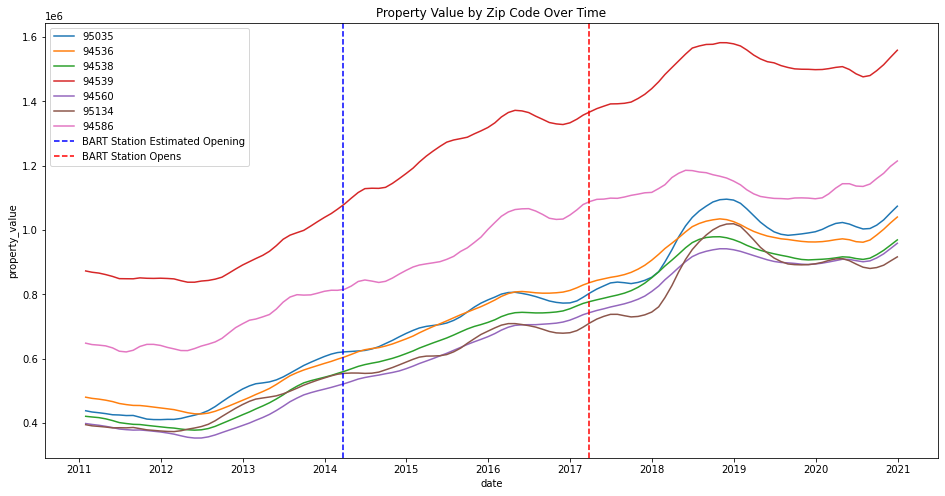

In [ ]:

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
plt.title('Property Value by Zip Code Over Time')             
sns.lineplot(data=h_data, x="date", y='property_value', hue="zip_code")  
plt.axvline(pd.to_datetime('2014-03-25'), color='blue', linestyle='--', label='BART Station Estimated Opening')
plt.axvline(pd.to_datetime('2017-03-25'), color='red', linestyle='--', label='BART Station Opens')
plt.legend()

plt.show()

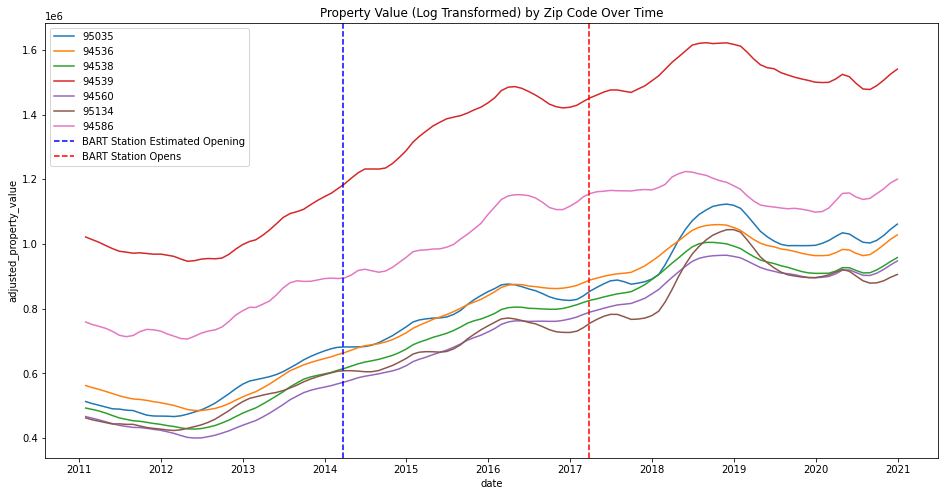

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
plt.title('Property Value (Log Transformed) by Zip Code Over Time')             
sns.lineplot(data=h_data, x="date", y='adjusted_property_value', hue="zip_code")  
plt.axvline(pd.to_datetime('2014-03-25'), color='blue', linestyle='--', label='BART Station Estimated Opening')
plt.axvline(pd.to_datetime('2017-03-25'), color='red', linestyle='--', label='BART Station Opens')
plt.legend()

plt.show()

hex_cell_13b3f9d9-c109-45d2-aa22-92c93850f7fc.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('cool', n_years)


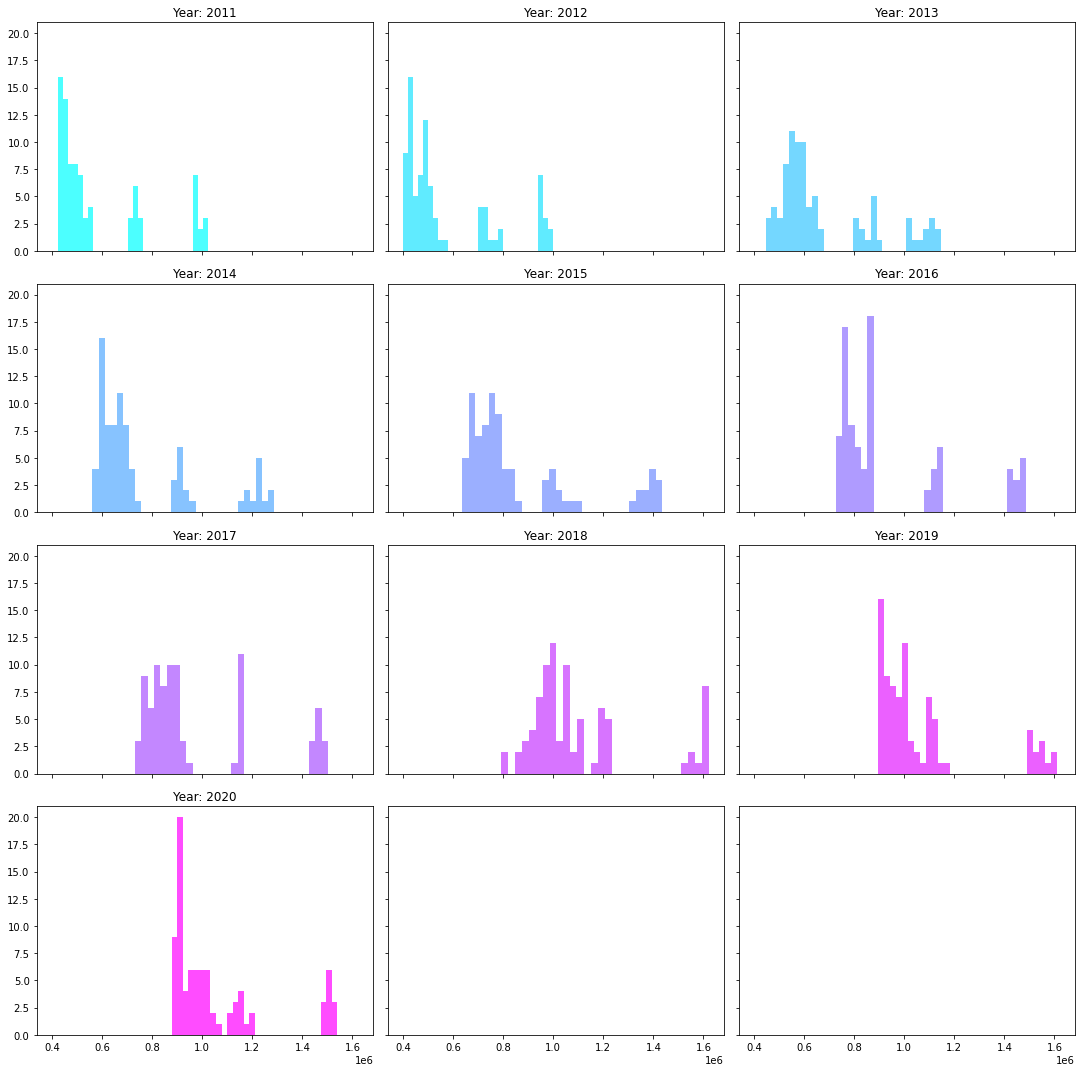

In [ ]:
import matplotlib.cm as cm

years = h_data['year'].unique()
n_years = len(years)

#colormap for years
colors = cm.get_cmap('cool', n_years)

fig, axes = plt.subplots(n_years // 3 + 1, 3, figsize=(15, 15), sharex=True, sharey=True)

for ax, year, color in zip(axes.flatten(), years, colors(range(n_years))):
    subset = h_data[h_data['year'] == year]
    ax.hist(subset['adjusted_property_value'], bins=30, alpha=0.7, color=color)
    ax.set_title(f'Year: {year}')

plt.tight_layout()
plt.show()


hex_cell_7c61165c-3c2a-4af7-93c6-0d37c86a1035.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('cool', n_years)


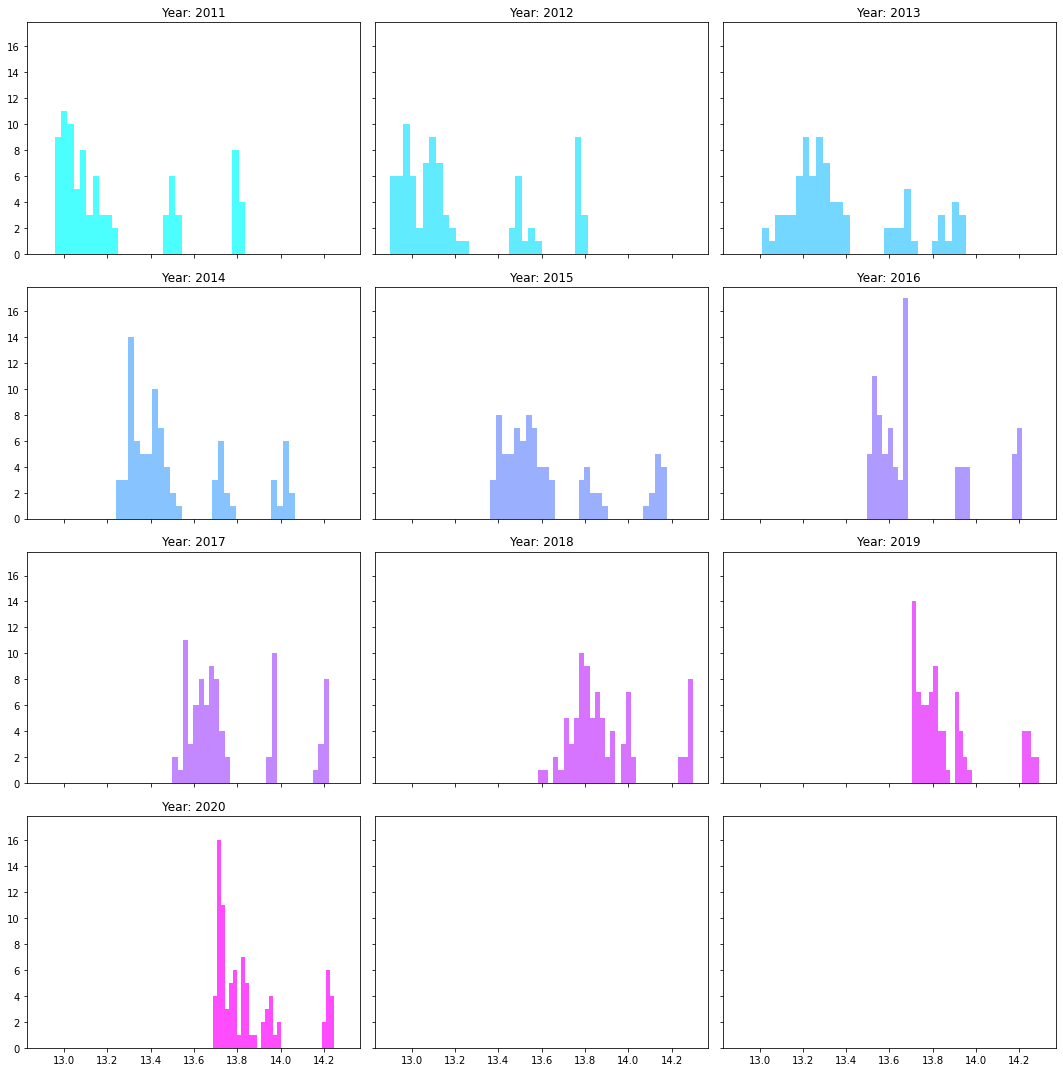

In [ ]:
years = h_data['year'].unique()
n_years = len(years)

#colormap for years
colors = cm.get_cmap('cool', n_years)

fig, axes = plt.subplots(n_years // 3 + 1, 3, figsize=(15, 15), sharex=True, sharey=True)

for ax, year, color in zip(axes.flatten(), years, colors(range(n_years))):
    subset = h_data[h_data['year'] == year]
    ax.hist(subset['log_property_value'], bins=30, alpha=0.7, color=color)
    ax.set_title(f'Year: {year}')

plt.tight_layout()
plt.show()

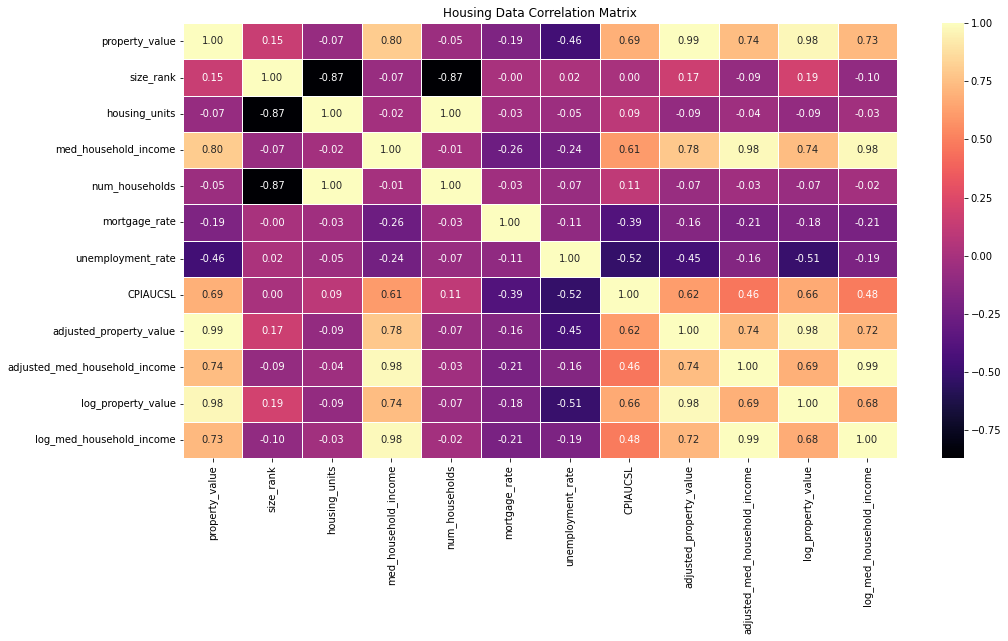

In [ ]:
#get only the numeric columns for the correlation matrix
numeric_columns = h_data.select_dtypes(include=['number'])#.drop(columns=['post_treatment', 'treatment_group'])
corr_matrix = numeric_columns.corr()

#plot the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Housing Data Correlation Matrix')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

housing_data_vif = h_data.copy()

#label encoder to one hot encode size rank column
label_encoder = LabelEncoder()
housing_data_vif['size_rank_encoded'] = label_encoder.fit_transform(housing_data_vif['size_rank'])

#check for multicollinearity using VIF
X = housing_data_vif.drop(['property_value', 'log_property_value','date', 'zip_code', 'size_rank', 'year'], axis=1)

X = X.fillna(0)  #replace all null values with 0
X = X.replace([np.inf, -np.inf], 0)  #replace infinite values with 0

X = sm.add_constant(X)  #add constant column for vif calc

In [ ]:
#calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("Variance Inflation Factors:")
print(vif_data)

# Drop variables with high VIF values (>5 or >10) if necessary
# housing_data_filtered_new = housing_data_filtered.drop(columns=['housing_units','size_rank'])

Variance Inflation Factors:
                         variable            VIF
0                           const  797418.037975
1                   housing_units    1189.898509
2            med_household_income    2040.437529
3                  num_households    1245.655191
4                   mortgage_rate       1.459666
5               unemployment_rate       2.249160
6                        CPIAUCSL     108.150675
7         adjusted_property_value       7.451745
8   adjusted_med_household_income    3248.187072
9        log_med_household_income     386.805687
10              size_rank_encoded      10.166437


EDA Summary 

How do our findings in EDA set up our analysis.

i.e. parallel trends assumption (plot shows that there were similar trends in property value.

i.e. the data was not normally distributed so we needed to work with log-transformed data.

i.e. WLS instead of OSL --> justify this decision.



### Regression Analysis



In [ ]:
#serial correlation, heteroskedasticity
#behavioral econ: why transit may not be valued, attitudes/behavior towards homebuying and effect on demand
#omitted variables/robustness of the data
#also treid to drop some zips and made r2 worse but fstat lower, model performance deprecated. even less stat sig
#looked at resid log transformed and not log transformed and log transformed was better
#keep model 3, talk about OMV, main takeaway from project is that the combined effect for interaction term, reduction but not stat sig
#fail to reject null 

In [ ]:
# make a copy of the df
h_data = h_data.copy()

# create a new variable: binary post treatment term 
h_data['post_treatment'] = ((h_data['date'] >= '2013-01-31') & (h_data['date'] <= '2020-12-31')).astype(int)

# Creat a new variable: 'treatment_group', the two zip codes that were most affected by the BART station opening
h_data['treatment_group'] = h_data['zip_code'].isin(['94538','94539']).astype(int)

# create an interaction term between post_treatment and treatment_group
h_data['interaction'] = h_data['treatment_group'] * h_data['post_treatment']

In [ ]:
# Importing necessary libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fitting the model to regress property_value on the interaction between treatment_group and post_treatment and other constant terms 
formula_ols = 'log_property_value ~ post_treatment + treatment_group + interaction + mortgage_rate + unemployment_rate'

model_ols = smf.ols(formula_ols, data=h_data).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:     log_property_value   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     139.8
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.13e-107
Time:                        03:21:40   Log-Likelihood:                -26.988
No. Observations:                 840   AIC:                             65.98
Df Residuals:                     834   BIC:                             94.38
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.0134      0.14

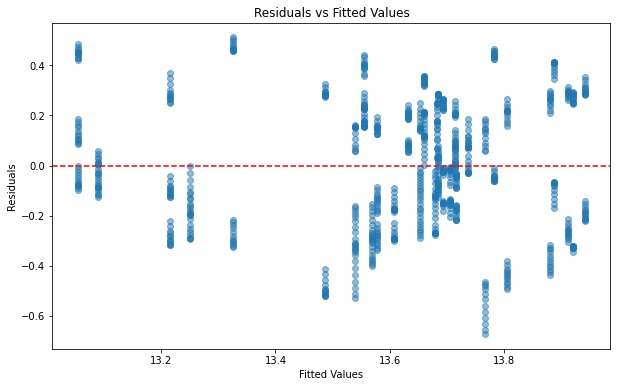

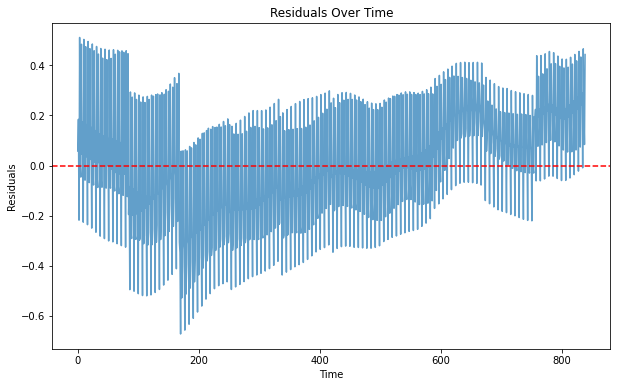

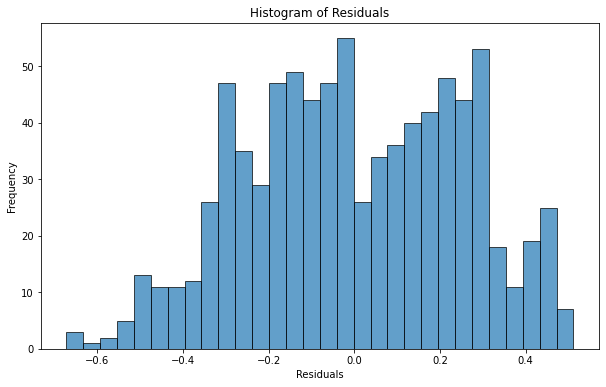

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you have fitted a model like this:
#model = sm.OLS(y, X).fit()

# Extract fitted values and residuals
fitted_values_ols = model_ols.fittedvalues
residuals_ols = model_ols.resid

# Residuals vs Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_ols, residuals_ols, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs Time Plot (if you have a time variable)
plt.figure(figsize=(10, 6))
plt.plot(residuals_ols, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_ols, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Resid vs fitted values: residuals spread with no pattern, but slight clusters at certain values which suggest heteroskedasticity and OMV. 

resid over time: clear pattern which indicates autocorr, which violates independent residual assumption for well-fitted models

hist of resid: a bell shaped hist suggests approx normal, but ours is slightly bell shaped with a right skew, whcih suggests a deviation from normality. 




Explain that there is autocorrelation and we need to lag the property value data. 



In [ ]:
# Copy df 
h_data_lag = h_data.copy()

# create a time lag to correct for serial correlation 
h_data_lag['log_property_value_lag1'] = h_data_lag['log_property_value'].shift(1)


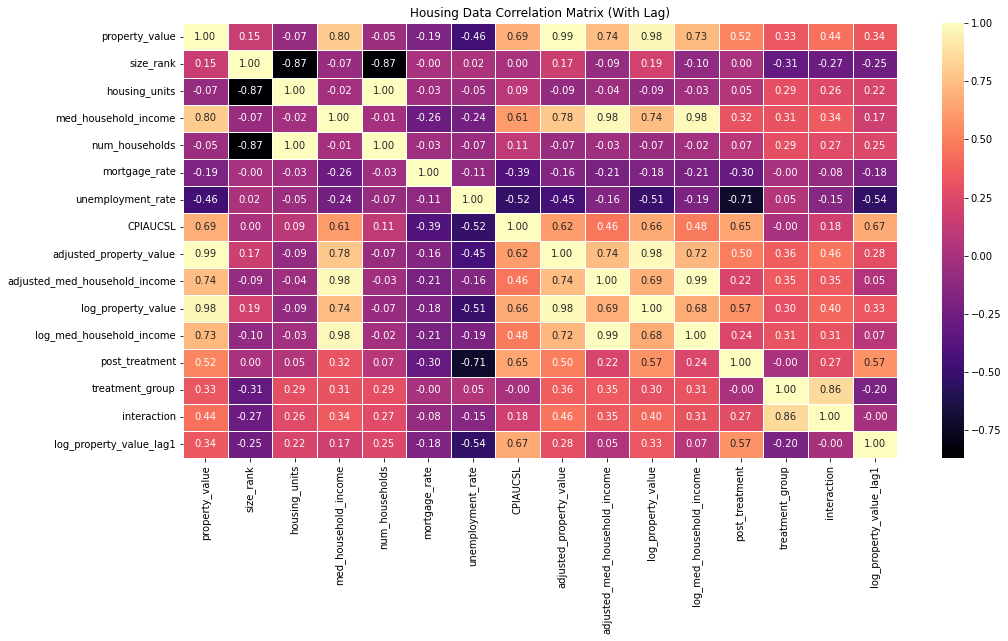

In [ ]:
#get only the numeric columns for the correlation matrix
numeric_columns_lag = h_data_lag.select_dtypes(include=['number'])#.drop(columns=['num_households'])
corr_matrix_lag = numeric_columns_lag.corr()

#plot the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix_lag, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Housing Data Correlation Matrix (With Lag)')
plt.show()

In [ ]:
# Dropping null value that result from the lag
h_data_lag = h_data_lag.dropna(subset=['log_property_value_lag1'])

print(h_data_lag.isnull().sum())

date                             0
year                             0
property_value                   0
zip_code                         0
size_rank                        0
housing_units                    0
med_household_income             0
num_households                   0
mortgage_rate                    0
unemployment_rate                0
CPIAUCSL                         0
adjusted_property_value          0
adjusted_med_household_income    0
log_property_value               0
log_med_household_income         0
post_treatment                   0
treatment_group                  0
interaction                      0
log_property_value_lag1          0
dtype: int64


In [ ]:
# Importing necessary libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fitting the model to regress property_value on the interaction between treatment_group and post_treatment and other constant terms 
formula_wls = 'log_property_value ~ post_treatment + treatment_group + interaction + log_property_value_lag1 + mortgage_rate + unemployment_rate'

model_wls = smf.wls(formula_wls, data=h_data_lag).fit(cov_type='cluster', cov_kwds={'groups': h_data_lag['year']})
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:     log_property_value   R-squared:                       0.456
Model:                            WLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     9602.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.33e-16
Time:                        03:21:42   Log-Likelihood:                -26.857
No. Observations:                 839   AIC:                             67.71
Df Residuals:                     832   BIC:                             100.8
Df Model:                           6                                         
Covariance Type:              cluster                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

**WEIGHTED LEAST SQUARES WITH WEIGHTING CALCULATED**



In [ ]:
formula_ols_2 = 'log_property_value ~ post_treatment + treatment_group + interaction + log_property_value_lag1 + mortgage_rate + unemployment_rate'

ols_model_2 = smf.ols(formula_ols_2, data=h_data_lag).fit()

h_data_lag['residuals'] = model_ols.resid
h_data_lag['weights'] = 1 / h_data_lag.groupby('zip_code')['residuals'].transform('var')

In [ ]:
# Importing necessary libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define weights based on housing units
#h_data_lag['weights'] = h_data_lag['num_households']

X_wls = h_data_lag[['post_treatment', 'treatment_group', 'interaction', 'log_property_value_lag1',
                    'mortgage_rate', 'unemployment_rate']]

X_wls = sm.add_constant(X_wls)

# Fit WLS model without including housing_units in the predictors
wls_model = sm.WLS(h_data_lag['log_property_value'], X_wls, weights=h_data_lag['weights']).fit()
print(wls_model.summary())

# Fitting the model to regress property_value on the interaction between treatment_group and post_treatment and other constant terms 
#formula_wls = 'log_property_value ~ post_treatment + treatment_group + interaction + mortgage_rate + unemployment_rate'

#model_ols = smf.ols(formula_ols, data=h_data).fit()
#print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:     log_property_value   R-squared:                       0.476
Model:                            WLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     126.1
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.95e-113
Time:                        03:21:42   Log-Likelihood:                -55.262
No. Observations:                 839   AIC:                             124.5
Df Residuals:                     832   BIC:                             157.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

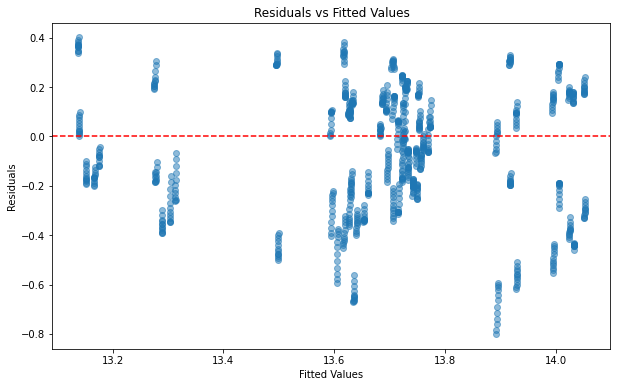

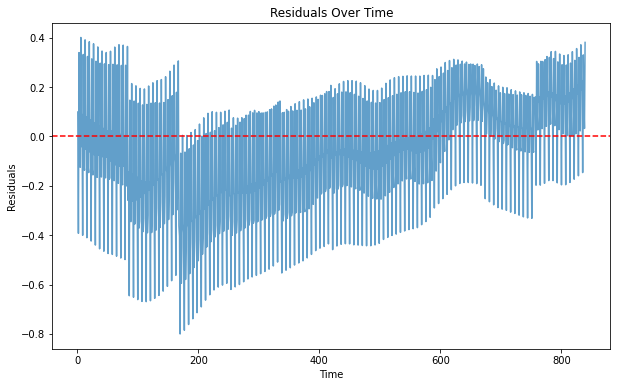

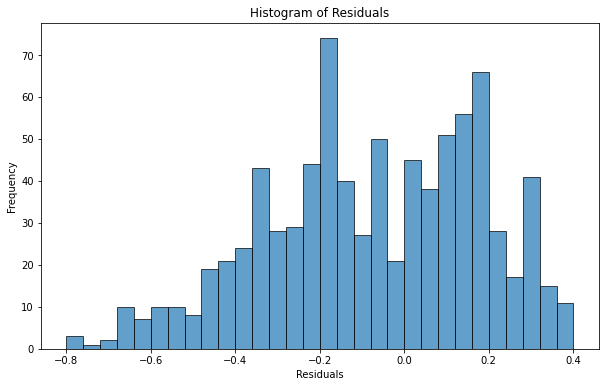

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you have fitted a model like this:
# model = sm.OLS(y, X).fit()

# Extract fitted values and residuals
fitted_values_wls = wls_model.fittedvalues
residuals_wls = wls_model.resid

# Residuals vs Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_wls, residuals_wls, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Residuals vs Time Plot (if you have a time variable)
plt.figure(figsize=(10, 6))
plt.plot(residuals_wls, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_wls, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model_wls.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')

Durbin-Watson Statistic: 2.259433435483392


#did vioaltes na

Mastering metrics to explain WLS and durbin-watson

VIF, multicollinearity, corr matrix, serial correlation corrected with clustered SE by zip code in the wls model, lag. [fix order]. serial correlation within time pd (the years) p. 227. serial corr w/in clusters, cluster se more accurate assessment of SS. 

housing market proxy is mortgage rates, demand proxy is unemployment rates.  OVB, IV couldn't do with the data that we had. endogeneity (simultaneity)



**CONCLUSION**

**Model Outcome**

We fail to reject our null hypothesis that the construction and completion of the Warm Springs Transit Center has no effect on local property values in the two zip codes in closest proximity to the Warm Springs Transit Center. The coefficient of interest, the interaction between `post_treatment` * `treatment_group` , is -0.0584, but the p-value is greater than greater than the significance level alpha = 0.05, at 0.201. This means that we cannot definitively conclude that the investment in public transportation at Warm Springs had a statistically significant effect on property values in the treatment group, during the post treatment period. 

The variables, `mortgage_rage` and `unemployment_rate` did have statistically significant effects on property value. Specifically, since we log-transformed the data, we can interpret  the coefficients as percentage changes; an approximate -10% change in mortgage rates and -4% change in unemployment rates, respectively, increase property value in the zip codes in this data set. 

However, we can cannot confidently generalize these results past the zip codes in this data. There is likely omitted variable bias as we could not control for median household income, household size, or number of households without encountering multicollinearity.  This means that the coefficients predicted may be artificially larger than we would observe in the real world. The error term includes the omitted variables, any errors in aggregating the dependent variable Yit (log-transformed property value) and unobserved factors such as changes in demand that cannot be quantified, and random noise. Hence, the error term introduces endogeneity to the regression, which makes the model unreliable for estimating because the omitted variables in the error term may be correlated with one or more of our independent variables. 

**Implications for the Research Question and Overall Conclusions**

**Future Research and Amendments to Methodology**

****

****

- model outcome and residuals (p-value, hypotheses, DW stat)
- implications for the research question and conclusions/causation

